# MVD 11. cvičení


## 1. část - Collaborative Filtering (item-item)

Vytvořte si matici podle příkladu v přednášce na item-item přístup na snímku 24. Využijte centered cosine similarity pro výpočet podobností stejně jako v přednášce a vyberte dva nejbližší sousedy. Ověřte, že je výsledek v přednášce správný a implementujte funkci tak, aby bylo možné jednoduše spočítat i libovolné další vyhodnocení.

In [270]:
import numpy as np

In [271]:
matrix = np.array([
    [1, None, 3, None, None, 5, None, None, 5, None, 4, None],
    [None, None, 5, 4, None, None, 4, None, None, 2, 1, 3],
    [2, 4, None, 1, 2, None, 3, None, 4, 3, 5, None],
    [None, 2, 4, None, 5, None, None, 4, None, None, 2, None],
    [None, None, 4, 3, 4, 2, None, None, None, None, 2, 5],
    [1, None, 3, None, 3, None, None, 2, None, None, 4, None],
], dtype=np.float)

assert matrix.shape == (6, 12), matrix.shape


In [272]:
means = np.nanmean(matrix, axis=1).reshape((matrix.shape[0], 1))
means

array([[3.6       ],
       [3.16666667],
       [3.        ],
       [3.4       ],
       [3.33333333],
       [2.6       ]])

In [273]:
centered_matrix = np.subtract(matrix, means, where=matrix != np.nan)
centered_matrix

array([[-2.6       ,         nan, -0.6       ,         nan,         nan,
         1.4       ,         nan,         nan,  1.4       ,         nan,
         0.4       ,         nan],
       [        nan,         nan,  1.83333333,  0.83333333,         nan,
                nan,  0.83333333,         nan,         nan, -1.16666667,
        -2.16666667, -0.16666667],
       [-1.        ,  1.        ,         nan, -2.        , -1.        ,
                nan,  0.        ,         nan,  1.        ,  0.        ,
         2.        ,         nan],
       [        nan, -1.4       ,  0.6       ,         nan,  1.6       ,
                nan,         nan,  0.6       ,         nan,         nan,
        -1.4       ,         nan],
       [        nan,         nan,  0.66666667, -0.33333333,  0.66666667,
        -1.33333333,         nan,         nan,         nan,         nan,
        -1.33333333,  1.66666667],
       [-1.6       ,         nan,  0.4       ,         nan,  0.4       ,
                nan,  

In [274]:
def cossim(a, b):
    return np.dot(a, b.T) / (np.linalg.norm(a) * np.linalg.norm(b))

In [275]:
def fill_with_cossim(centered_mat, row_idx, column_idx, use_n_similarities=2):
    significant_row = np.nan_to_num(centered_matrix[row_idx, :], nan=0.)
    similarities = np.zeros((centered_mat.shape[0], 1))
    for i in range(centered_matrix.shape[0]):
        secondary_row = np.nan_to_num(centered_matrix[i, :], nan=0.)
        similarities[i] = cossim(significant_row, secondary_row)

    # find the index of largest similarity
    true_indexes = sorted(range(len(similarities.ravel())), key=lambda i: similarities[i])[-3:] # argsort, partition neither other worked
    true_indexes.remove(row_idx) # except self-similarity
    max_similarity_indexes = np.zeros(similarities.shape, dtype=np.bool)
    max_similarity_indexes[true_indexes, :] = True

    values_from_mat = np.nan_to_num(centered_mat[max_similarity_indexes.ravel(), column_idx], nan=0.).reshape(use_n_similarities, 1)
    similarities_for_values = similarities[max_similarity_indexes].reshape(use_n_similarities, 1)
    final_score = (values_from_mat.T @ similarities_for_values) / np.sum(similarities)

    centered_mat[row_idx, column_idx] = final_score

In [277]:
for k in range(centered_matrix.shape[1]):
    for i in range(centered_matrix.shape[0]):
        if np.isnan(centered_matrix[i, k]):
            fill_with_cossim(centered_matrix, i, k)

centered_matrix

array([[-2.6       ,  0.2934099 , -0.6       , -0.6447565 , -0.20880109,
         1.4       ,  0.        , -0.29183546,  1.4       ,  0.        ,
         0.4       ,  0.        ],
       [ 0.        , -0.76509006,  1.83333333,  0.83333333,  1.57424919,
        -0.61647051,  0.83333333,  0.44254914,  0.        , -1.16666667,
        -2.16666667, -0.16666667],
       [-1.        ,  1.        , -0.09272279, -2.        , -1.        ,
         1.26719749,  0.        , -1.10879769,  1.        ,  0.        ,
         2.        ,  0.        ],
       [ 0.        , -1.4       ,  0.6       ,  0.26302395,  1.6       ,
        -1.06984725,  0.65330511,  0.6       ,  0.        , -0.86537312,
        -1.4       ,  0.91818215],
       [ 0.        , -0.90395725,  0.66666667, -0.33333333,  0.66666667,
        -1.33333333,  0.84322801,  0.56947997,  0.        , -1.12953063,
        -1.33333333,  1.66666667],
       [-1.6       ,  0.50124657,  0.4       , -1.24885043,  0.4       ,
         1.15999437,  

## Bonus - Content-based Filtering

Stáhněte si Kaggle dataset [Spotify Recommendation system](https://www.kaggle.com/bricevergnou/spotify-recommendation). Y datasetu budete pot5ebovat:

- data.csv = příznaky k jednotlivým skladbám + příznak liked pro klasifikaci

Úkolem je:

1. Načíst data z csv.
2. Vytvořit train (90 %) a test (10 %) split pomocí knihovny [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).
3. Vytvořit model logistické regrese (vlastní implementace / využití knihovny sklearn nebo jiné).
4. Vyhodnotit data na testovací sadě (např. metoda score u LogisticRegression).

**Skóre pro uznání úlohy musí být vyšší než 89 %.**

Dobrovolné: vytvořit graf predikovaných vs aktuálních hodnot
Získání bodu navíc: Využijte i další algoritmy pro binární klasifikaci.

In [278]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [279]:
df = pd.read_csv('data.csv')
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
0,0.803,0.6240,7,-6.764,0,0.0477,0.451,0.000734,0.1000,0.6280,95.968,304524,4,0
1,0.762,0.7030,10,-7.951,0,0.3060,0.206,0.000000,0.0912,0.5190,151.329,247178,4,1
2,0.261,0.0149,1,-27.528,1,0.0419,0.992,0.897000,0.1020,0.0382,75.296,286987,4,0
3,0.722,0.7360,3,-6.994,0,0.0585,0.431,0.000001,0.1230,0.5820,89.860,208920,4,1
4,0.787,0.5720,1,-7.516,1,0.2220,0.145,0.000000,0.0753,0.6470,155.117,179413,4,1


In [280]:
X, y = df.to_numpy()[:, :-1].astype('float'), df.to_numpy()[:, -1:].astype('float')
X[:2, :], y[:2, :]

(array([[ 8.03000e-01,  6.24000e-01,  7.00000e+00, -6.76400e+00,
          0.00000e+00,  4.77000e-02,  4.51000e-01,  7.34000e-04,
          1.00000e-01,  6.28000e-01,  9.59680e+01,  3.04524e+05,
          4.00000e+00],
        [ 7.62000e-01,  7.03000e-01,  1.00000e+01, -7.95100e+00,
          0.00000e+00,  3.06000e-01,  2.06000e-01,  0.00000e+00,
          9.12000e-02,  5.19000e-01,  1.51329e+02,  2.47178e+05,
          4.00000e+00]]),
 array([[0.],
        [1.]]))

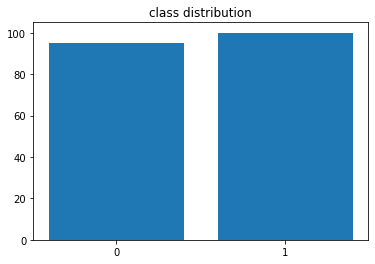

In [281]:
plt.bar(['0', '1'], [y[y == 0.].shape[0], y[y == 1].shape[0]])
plt.title('class distribution')
plt.show()

In [282]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1, shuffle=True)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((175, 13), (20, 13), (175, 1), (20, 1))

In [283]:
model = LogisticRegression()
model.fit(X_train, y_train.ravel())

LogisticRegression()

In [284]:
acc = model.score(X_test, y_test)
acc

0.75